<a href="https://colab.research.google.com/github/IsraaFahmy/Statistics-and-Data-Science-Micromasters-/blob/main/MITx%2018.6501x/Notebooks/stats_w8b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression Analysis with R

- Perform linear regression analysis using R
- Use R to build logistic regression models

In [ ]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
head(pressure)

,temperature,pressure
,<dbl>,<dbl>
1,0,0.0002
2,20,0.0012
3,40,0.0060
4,60,0.0300
5,80,0.0900
6,100,0.2700


`geom_smooth()` using formula = 'y ~ x'


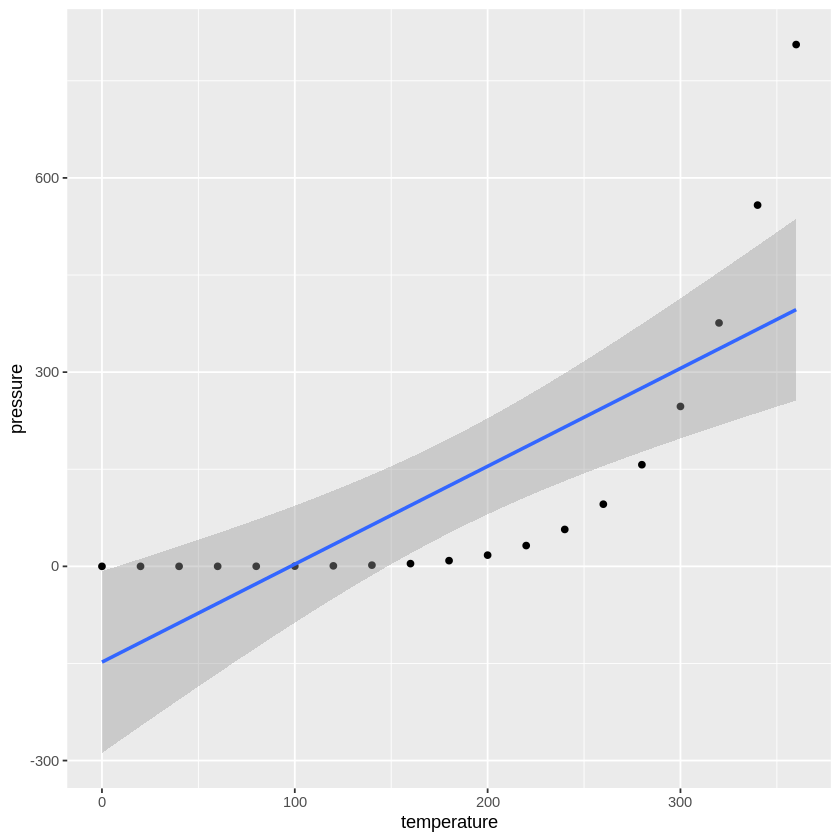

In [ ]:
ggplot(pressure, aes(x = temperature, y = pressure)) +
  geom_point() +
  geom_smooth(method = 'lm')

In [ ]:
model <- lm(pressure ~ temperature, data = pressure)

In [ ]:
summary(model)


Call:
lm(formula = pressure ~ temperature, data = pressure)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.08 -117.06  -32.84   72.30  409.43 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -147.8989    66.5529  -2.222 0.040124 *  
temperature    1.5124     0.3158   4.788 0.000171 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 150.8 on 17 degrees of freedom
Multiple R-squared:  0.5742,	Adjusted R-squared:  0.5492 
F-statistic: 22.93 on 1 and 17 DF,  p-value: 0.000171


In [ ]:
pressure$temp2 <- pressure$temperature * pressure$temperature

In [ ]:
model2 <- lm(pressure ~ temperature + temp2, data = pressure)

In [ ]:
summary(model2)


Call:
lm(formula = pressure ~ temperature + temp2, data = pressure)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.142 -54.391  -1.353  48.238 170.374 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 91.154379  46.262513   1.970 0.066354 .  
temperature -2.706167   0.595775  -4.542 0.000333 ***
temp2        0.011718   0.001597   7.336 1.67e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74.42 on 16 degrees of freedom
Multiple R-squared:  0.9024,	Adjusted R-squared:  0.8902 
F-statistic:    74 on 2 and 16 DF,  p-value: 8.209e-09


### Logistic Regression

In [ ]:
df <- read_csv('grad.csv')

Rows: 400 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): admit, gre, gpa, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(df)

admit,gre,gpa,rank
<dbl>,<dbl>,<dbl>,<dbl>
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [ ]:
log_model <- glm(admit ~ gre + gpa + rank, data = df, family = 'binomial')

In [ ]:
summary(log_model)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.449548   1.132846  -3.045  0.00233 ** 
gre          0.002294   0.001092   2.101  0.03564 *  
gpa          0.777014   0.327484   2.373  0.01766 *  
rank        -0.560031   0.127137  -4.405 1.06e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 459.44  on 396  degrees of freedom
AIC: 467.44

Number of Fisher Scoring iterations: 4


In [ ]:
coef(log_model)

(Intercept)         gre         gpa        rank 
-3.44954840  0.00229396  0.77701357 -0.56003139

In [ ]:
head(df)

admit,gre,gpa,rank
<dbl>,<dbl>,<dbl>,<dbl>
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [ ]:
coef<- 0.002294

In [ ]:
1/(1 + exp(-(coef*380 - 3.45)))

[1] 0.07054943

In [ ]:
1/(1 + exp(-(coef*660 - 3.45)))

[1] 0.1260924

In [ ]:
1/(1 + exp(-(coef*800 - 3.45)))

[1] 0.1659233

In [ ]:
f <- function(x){1/1 + exp(-(coef*x - 3.45))}

In [ ]:
f(df$gre)

[1] 14.174459  7.930694  6.026882  8.256082 10.555530  6.509975  9.717740
  [8] 13.583671 10.127027  7.323039  6.026882 12.480386  6.509975  7.323039
 [15]  7.323039 11.473832  6.262888 14.792983  6.026882 10.127027 11.004150
 [22]  7.930694  8.953404  7.619898  6.509975  6.026882  8.596746 10.555530
 [29]  6.262888 10.555530 10.127027  6.509975  8.953404  6.026882 14.792983
 [36] 13.583671  9.326806 10.555530 11.004150 10.555530  9.717740  9.326806
 [43]  8.953404 11.004150  7.323039 11.965566  9.326806 11.004150 12.480386
 [50] 13.583671  8.256082 12.480386  6.768661  7.619898  7.930694  6.768661
 [57]  9.717740 14.174459 13.583671  8.953404  8.596746  9.717740  8.256082
 [64]  7.619898  9.326806  8.953404  6.768661  8.596746  9.326806  6.026882
 [71]  8.256082 16.828308 11.473832  9.326806  7.039493  7.039493  9.717740
 [78]  6.026882 10.127027  8.596746  7.323039  8.596746 11.004150 14.174459
 [85] 11.004150 10.555530  8.953404  8.953404  7.323039  7.930694  7.323039
 [92]  7.039493  6.026882  9.326806  7.930694  7.930694  8.256082 11.473832
 [99]  7.323039 13.583671 15.440547  9.326806 14.174459 10.127027  7.930694
[106]  6.768661  7.323039 11.473832 13.583671 11.473832  7.619898 13.019376
[113] 14.792983  8.953404  7.039493  8.596746 12.480386  7.323039  6.026882
[120] 15.440547 10.555530 11.473832 10.555530 11.004150  7.039493 10.127027
[127]  8.953404  6.768661 10.127027 11.965566  8.596746  8.256082  9.326806
[134] 11.004150  9.717740 11.004150  9.717740  7.323039  8.596746  8.953404
[141]  8.256082  7.323039  8.596746  9.326806  9.326806 14.174459 11.473832
[148]  9.717740 11.473832  6.768661  6.026882 13.583671  8.256082  9.326806
[155]  8.596746  9.326806  9.717740 11.473832  7.930694  7.323039  8.953404
[162]  8.256082  7.323039 10.555530  9.326806  7.323039 12.480386  7.039493
[169] 11.004150  8.953404 13.583671 10.127027  7.619898  6.026882 11.004150
[176]  8.596746 10.555530  8.596746  8.596746 16.828308  8.596746 11.004150
[183]  7.323039 10.127027 11.004150  6.026882  9.717740  9.326806  9.717740
[190] 11.004150  8.256082  6.026882  8.256082 14.174459  8.953404  9.717740
[197]  7.930694 13.583671  8.953404  9.326806  6.026882  9.326806  7.323039
[204] 13.019376  8.953404  6.262888  6.768661  8.256082 10.127027  9.326806
[211]  6.768661  9.326806 11.965566  8.256082  8.953404  7.930694 15.440547
[218] 11.965566 11.965566  9.717740 10.127027  7.619898 11.473832  6.026882
[225]  6.026882  7.039493  8.596746 10.127027 11.473832  7.039493  9.326806
[232]  8.953404 14.174459 13.019376  6.026882  8.596746  7.930694 11.473832
[239] 11.004150  7.323039 12.480386 10.555530  7.619898  8.596746 10.127027
[246]  6.026882  7.619898 12.480386  7.619898  8.256082  7.930694  8.596746
[253] 10.555530 10.127027  6.768661  8.256082 10.555530  8.596746 10.555530
[260]  8.256082  7.619898 12.480386 10.555530  8.596746 10.555530 14.174459
[267]  9.717740  8.953404  7.619898 11.004150  8.256082 10.127027  7.619898
[274]  7.930694 10.555530  8.953404 11.965566  9.326806  7.619898  7.930694
[281]  7.930694 14.792983  7.930694 10.555530 12.480386  8.953404  6.026882
[288]  7.930694  6.026882 13.019376  8.596746  6.026882  7.619898  6.026882
[295] 11.473832 10.555530  9.717740 11.965566 10.127027  7.039493  8.256082
[302]  7.930694 13.583671  7.619898 20.016747  9.326806 10.127027  9.326806
[309] 10.127027 12.480386  9.717740  7.930694  7.930694 10.555530 10.127027
[316] 16.828308 15.440547  6.262888 11.473832 10.127027 11.965566 11.965566
[323] 11.004150 13.019376 10.555530  7.619898  7.619898  9.717740  9.326806
[330] 11.004150  6.768661  7.930694 13.019376  9.717740 11.965566  8.596746
[337] 10.555530  8.596746 10.127027  7.930694 11.004150  9.717740 11.004150
[344]  9.326806 10.555530 11.004150  8.953404  9.326806 13.583671  8.596746
[351]  6.262888  8.596746  9.326806  7.323039 10.127027  6.509975  7.323039
[358]  7.039493  9.717740  7.039493 10.555530 10.127027  7.619898 11.965566
[365]  9.717740 11.473832 11.965566  8.596746  9.3

In [ ]:
cluster_data <- read_csv('credit_clusters.csv')

New names:
• `` -> `...1`
Rows: 8636 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (19): ...1, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INS...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
model <- glm(label ~ ., data = cluster_data, family = 'binomial')

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
summary(model)


Call:
glm(formula = label ~ ., family = "binomial", data = cluster_data)

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -1.050e+01  8.107e-01 -12.949  < 2e-16 ***
...1                              4.698e-05  2.457e-05   1.912 0.055856 .  
BALANCE                          -6.569e-04  6.373e-05 -10.308  < 2e-16 ***
BALANCE_FREQUENCY                 1.493e+00  4.139e-01   3.608 0.000309 ***
PURCHASES                        -9.686e-01  1.578e+01  -0.061 0.951061    
ONEOFF_PURCHASES                  9.710e-01  1.578e+01   0.062 0.950941    
INSTALLMENTS_PURCHASES            9.727e-01  1.578e+01   0.062 0.950854    
CASH_ADVANCE                     -3.060e-05  4.630e-05  -0.661 0.508738    
PURCHASES_FREQUENCY              -2.884e+00  7.397e-01  -3.899 9.66e-05 ***
ONEOFF_PURCHASES_FREQUENCY        6.934e+00  7.068e-01   9.810  < 2e-16 ***
PURCHASES_INSTALLMENTS_FREQUENCY  1.128e+00  6.914e-01   1.632 0.102775    